# NHEK spacetime

This This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).
It explores the global Near-Horizon Extremal Kerr (NHEK) spacetime $(\mathcal{N}, h)$. 

This notebook requires a version of SageMath at least equal to 9.0:

In [1]:
version()

'SageMath version 9.5.beta2, Release Date: 2021-09-26'

First we set up the notebook to display mathematical objects using LaTeX rendering, and, to speed up computations, we ask for running them in parallel on 8 threads:

In [2]:
%display latex
Parallelism().set(nproc=8)

## Manifold

In [3]:
N = Manifold(4, 'N', latex_name=r'\mathscr{N}', structure='Lorentzian',
             metric_name='h')
print(N)

4-dimensional Lorentzian manifold N


Global coordinate chart $(\tau, y, \theta, \psi)$:

In [4]:
X.<ta, y, th, ps> = N.chart(r"ta:\tau y th:(0,pi):\theta ps:(0,2*pi):periodic:\psi") 
print(X)
X

Chart (N, (ta, y, th, ps))


Chart (N, (ta, y, th, ps))

In [5]:
X.coord_range()

ta: (-oo, +oo); y: (-oo, +oo); th: (0, pi); ps: [0, 2*pi] (periodic)

The coordinate 1-forms:

In [6]:
X.coframe()[:]

(1-form dta on the 4-dimensional Lorentzian manifold N,
 1-form dy on the 4-dimensional Lorentzian manifold N,
 1-form dth on the 4-dimensional Lorentzian manifold N,
 1-form dps on the 4-dimensional Lorentzian manifold N)

In [7]:
dta, dy, dth, dps = X.coframe()[:]

## NHEK metric

In [8]:
h = N.metric()
dpsydta = dps + y*dta
h.set((1 + cos(th)^2)*(- (1 + y^2)*(dta*dta)+ (dy*dy)/(1 + y^2) + dth*dth)
      + 4*sin(th)^2/(1 + cos(th)^2)*(dpsydta*dpsydta))
h.display()

h = -(sin(th)^4 + (sin(th)^4 - 8*sin(th)^2 + 4)*y^2 - 4*sin(th)^2 + 4)/(cos(th)^2 + 1) dta⊗dta + 4*y*sin(th)^2/(cos(th)^2 + 1) dta⊗dps + (cos(th)^2 + 1)/(y^2 + 1) dy⊗dy + (cos(th)^2 + 1) dth⊗dth + 4*y*sin(th)^2/(cos(th)^2 + 1) dps⊗dta + 4*sin(th)^2/(cos(th)^2 + 1) dps⊗dps

The NHEK metric is a solution of the **vacuum Einstein equation**:

In [9]:
h.ricci().display()

Ric(h) = 0

## Killing vectors

Two obvious Killing vectors are $\partial/\partial\psi$ and $\partial/\partial\tau$, since the components of $h$ do not depend on $\psi$ or $\tau$:

In [10]:
eta = N.vector_field(0, 0, 0, 1, name='eta', latex_name=r'\eta')
eta.display()

eta = ∂/∂ps

In [11]:
h.lie_derivative(eta).display()

0

In [12]:
J0 = N.vector_field(1, 0, 0, 0, name='J_0')
J0.display()

J_0 = ∂/∂ta

In [13]:
h.lie_derivative(J0).display()

0

A third Killing vector arises from the isometry expressed by $(T,R)\mapsto(\alpha T, R/\alpha)$ in Poincaré-type coordinates:

In [14]:
J1 = N.vector_field(y*sin(ta)/sqrt(1 + y^2),  -cos(ta)*sqrt(1 + y^2),
                    0, sin(ta)/sqrt(1 + y^2), name='J_1')
J1.display()        

J_1 = y*sin(ta)/sqrt(y^2 + 1) ∂/∂ta - sqrt(y^2 + 1)*cos(ta) ∂/∂y + sin(ta)/sqrt(y^2 + 1) ∂/∂ps

In [15]:
h.lie_derivative(J1).display()

0

Finally a fourth Killing vector is $\partial/\partial T$ of the Poincaré-type coordinates. We actually consider
the linear combination $\partial/\partial T - \partial/\partial\tau$ since it has slightly simpler components
in terms of the global coordinates $(\tau,y,\theta,\psi)$:

In [16]:
J2 = N.vector_field(y*cos(ta)/sqrt(1 + y^2),  sin(ta)*sqrt(1 + y^2),
                    0, cos(ta)/sqrt(1 + y^2), name='J_2')
J2.display() 

J_2 = y*cos(ta)/sqrt(y^2 + 1) ∂/∂ta + sqrt(y^2 + 1)*sin(ta) ∂/∂y + cos(ta)/sqrt(y^2 + 1) ∂/∂ps

In [17]:
h.lie_derivative(J2).display()

0

### Commutation relations

First of all we notice that $\eta$ commutes with all the three other Killing vectors:

In [18]:
[eta.bracket(j).display() for j in (J0, J1, J2)]

[[eta,J_0] = 0, [eta,J_1] = 0, [eta,J_2] = 0]

To write easily the other commutation relations, we supplement $(J_0, J_1, J_2)$ by $\partial/\partial\theta$ to make it a vector frame on $\mathscr{N}$:

In [19]:
J = N.vector_frame('J', (J0, J1, J2, X.frame()[2]))
J0, J1, J2 = J[:-1]
J

Vector frame (N, (J_0,J_1,J_2,J_3))

In [20]:
J2.display(J)

J_2 = J_2

In [21]:
for v in J:
    show(v.display())

J_0 = ∂/∂ta

J_1 = y*sin(ta)/sqrt(y^2 + 1) ∂/∂ta - sqrt(y^2 + 1)*cos(ta) ∂/∂y + sin(ta)/sqrt(y^2 + 1) ∂/∂ps

J_2 = y*cos(ta)/sqrt(y^2 + 1) ∂/∂ta + sqrt(y^2 + 1)*sin(ta) ∂/∂y + cos(ta)/sqrt(y^2 + 1) ∂/∂ps

J_3 = ∂/∂th

Then we ask for the display of the commutators in that frame:

In [22]:
J0.bracket(J1).display(J)

[J_0,J_1] = J_2

In [23]:
J0.bracket(J2).display(J)

[J_0,J_2] = -J_1

In [24]:
J1.bracket(J2).display(J)

[J_1,J_2] = -J_0

These commutation relations are not the standard ones for $\mathfrak{sl}(2,\mathbb{R})$; in order to get these, let us introduce the following linear combinations:

In [25]:
K0 = 2*J1
K0.set_name('K_0')
K0.display(J)

K_0 = 2 J_1

In [26]:
K1 = J2 - J0
K1.set_name('K_1')
K1.display(J)

K_1 = -J_0 + J_2

In [27]:
K2 = J2 + J0
K2.set_name('K_2')
K2.display(J)

K_2 = J_0 + J_2

In [28]:
K = N.vector_frame('K', (K0, K1, K2, X.frame()[2]))
K0, K1, K2 = K[:-1]
K

Vector frame (N, (K_0,K_1,K_2,K_3))

In [29]:
for v in K:
    show(v.display())

K_0 = 2*y*sin(ta)/sqrt(y^2 + 1) ∂/∂ta - 2*sqrt(y^2 + 1)*cos(ta) ∂/∂y + 2*sin(ta)/sqrt(y^2 + 1) ∂/∂ps

K_1 = (y*cos(ta) - sqrt(y^2 + 1))/sqrt(y^2 + 1) ∂/∂ta + sqrt(y^2 + 1)*sin(ta) ∂/∂y + cos(ta)/sqrt(y^2 + 1) ∂/∂ps

K_2 = (y*cos(ta) + sqrt(y^2 + 1))/sqrt(y^2 + 1) ∂/∂ta + sqrt(y^2 + 1)*sin(ta) ∂/∂y + cos(ta)/sqrt(y^2 + 1) ∂/∂ps

K_3 = ∂/∂th

We have then

In [30]:
K0.bracket(K1).display(K)

[K_0,K_1] = 2 K_1

In [31]:
K0.bracket(K2).display(K)

[K_0,K_2] = -2 K_2

In [32]:
K1.bracket(K2).display(K)

[K_1,K_2] = K_0

The above commutation relations are exactly those of $\mathfrak{sl}(2,\mathbb{R})$ in the standard matrix representation:

In [33]:
sl2 = lie_algebras.sl(QQ, 2, representation='matrix')  # QQ instead of RR to deal with an exact field
E,F,H = sl2.gens()
E,F,H

(
[0 1]  [0 0]  [ 1  0]
[0 0], [1 0], [ 0 -1]
)

In [34]:
all([H.bracket(E) == 2*E,
     H.bracket(F) == -2*F,
     E.bracket(F) == H])

True

# Conformal global coordinates

Let us introduce the "conformal" global coordinates $(\tau,\chi,\theta,\psi)$ such that $y = \tan\chi$:

In [35]:
XC.<ta, ch, th, ps> = N.chart(r"ta:\tau ch:(-pi/2,pi/2):\chi th:(0,pi):\theta ps:(0,2*pi):periodic:\psi") 
print(XC)
XC

Chart (N, (ta, ch, th, ps))


Chart (N, (ta, ch, th, ps))

In [36]:
XC.coord_range()

ta: (-oo, +oo); ch: (-1/2*pi, 1/2*pi); th: (0, pi); ps: [0, 2*pi] (periodic)

In [37]:
X_to_XC = X.transition_map(XC, [ta, atan(y), th, ps])
X_to_XC.display()

ta = ta
ch = arctan(y)
th = th
ps = ps

In [38]:
X_to_XC.inverse().display()

ta = ta
y = sin(ch)/cos(ch)
th = th
ps = ps

In [39]:
h.display(XC)

h = -(sin(th)^4 + 4*(cos(ch)^2 - 2)*sin(th)^2 + 4)/(cos(ch)^2*cos(th)^2 + cos(ch)^2) dta⊗dta + 4*sin(ch)*sin(th)^2/(cos(ch)*cos(th)^2 + cos(ch)) dta⊗dps + (cos(th)^2 + 1)/cos(ch)^2 dch⊗dch + (cos(th)^2 + 1) dth⊗dth + 4*sin(ch)*sin(th)^2/(cos(ch)*cos(th)^2 + cos(ch)) dps⊗dta + 4*sin(th)^2/(cos(th)^2 + 1) dps⊗dps

### Expression of the Killing vectors in terms of conformal coordinates:

In [40]:
for v in J[:-1]:
    show(v.display(XC))

J_0 = ∂/∂ta

J_1 = sin(ch)*sin(ta) ∂/∂ta - cos(ch)*cos(ta) ∂/∂ch + cos(ch)*sin(ta) ∂/∂ps

J_2 = cos(ta)*sin(ch) ∂/∂ta + cos(ch)*sin(ta) ∂/∂ch + cos(ch)*cos(ta) ∂/∂ps

In [41]:
for v in K[:-1]:
    show(v.display(XC))

K_0 = 2*sin(ch)*sin(ta) ∂/∂ta - 2*cos(ch)*cos(ta) ∂/∂ch + 2*cos(ch)*sin(ta) ∂/∂ps

K_1 = (cos(ta)*sin(ch) - 1) ∂/∂ta + cos(ch)*sin(ta) ∂/∂ch + cos(ch)*cos(ta) ∂/∂ps

K_2 = (cos(ta)*sin(ch) + 1) ∂/∂ta + cos(ch)*sin(ta) ∂/∂ch + cos(ch)*cos(ta) ∂/∂ps

# Poincaré patch

In [42]:
NP = N.open_subset('NP', latex_name=r'\mathscr{N}_{\rm P}',
                   coord_def={XC: [-ch - pi/2 < ta, ta < - ch - 3*pi/2]})
print(NP)

Open subset NP of the 4-dimensional Lorentzian manifold N


In [43]:
XP.<T,R,th,Ph> = NP.chart(r"T R th:(0,pi):\theta Ph:(0,2*pi):periodic:\Phi")
print(XP)
XP

Chart (NP, (T, R, th, Ph))


Chart (NP, (T, R, th, Ph))

In [44]:
Conf_to_Poinc = XC.transition_map(XP, [sin(ta)/(cos(ta) + sin(ch)),
                                       (cos(ta) + sin(ch))/cos(ch),
                                       th,
                                       ps + log((cos(ta)*cos(ch) + sin(ta)*sin(ch))/(sin(ta) + cos(ch)))])
Conf_to_Poinc.display()

T = sin(ta)/(cos(ta) + sin(ch))
R = (cos(ta) + sin(ch))/cos(ch)
th = th
Ph = ps + log((cos(ch)*cos(ta) + sin(ch)*sin(ta))/(cos(ch) + sin(ta)))

In [45]:
Conf_to_Poinc.set_inverse(atan2(2*R^2*T, R^2*(1 - T^2) +1) + pi*unit_step(-R),
                          atan((R^2*(1 + T^2) - 1)/(2*R)),
                          th,
                          Ph - ln(((1 - T*R)^2 + R^2)/sqrt(((1 + T^2)*R^2 - 1)^2 + 4*R^2)))

Check of the inverse coordinate transformation:
  ta == pi*unit_step(-(cos(ta) + sin(ch))/cos(ch)) + arctan2(2*(cos(ta) + sin(ch))*sin(ta)/cos(ch)^2, 2*(cos(ta)^2 + cos(ta)*sin(ch))/cos(ch)^2)  **failed**
  ch == arctan(sin(ch)/cos(ch))  **failed**
  th == th  *passed*
  ps == ps  *passed*
  T == (R^3*T^2*sin(pi*unit_step(-R)) - 2*R^3*T*cos(pi*unit_step(-R)) - R^3*sin(pi*unit_step(-R)) - R*sin(pi*unit_step(-R)))/(2*R^3*T*sin(pi*unit_step(-R)) - R^3*cos(pi*unit_step(-R)) + (R^3*cos(pi*unit_step(-R)) - R^2*abs(R))*T^2 - (R^2 - 1)*abs(R) - R*cos(pi*unit_step(-R)))  **failed**
  R == -1/2*(2*R^3*T*sin(pi*unit_step(-R)) - R^3*cos(pi*unit_step(-R)) + (R^3*cos(pi*unit_step(-R)) - R^2*abs(R))*T^2 - (R^2 - 1)*abs(R) - R*cos(pi*unit_step(-R)))/(R*abs(R))  **failed**
  th == th  *passed*
  Ph == Ph + log((R^2*T^2*abs(R)*sin(pi*unit_step(-R)) - 2*(R^2*cos(pi*unit_step(-R)) - R*sin(pi*unit_step(-R)))*T*abs(R) - (R^2*sin(pi*unit_step(-R)) + 2*R*cos(pi*unit_step(-R)) - sin(pi*unit_step(-R)))*abs(R))/

In [46]:
Conf_to_Poinc.inverse().display()

ta = pi*unit_step(-R) + arctan2(2*R^2*T, -(T^2 - 1)*R^2 + 1)
ch = arctan(1/2*((T^2 + 1)*R^2 - 1)/R)
th = th
ps = Ph - log(((R*T - 1)^2 + R^2)/sqrt(((T^2 + 1)*R^2 - 1)^2 + 4*R^2))

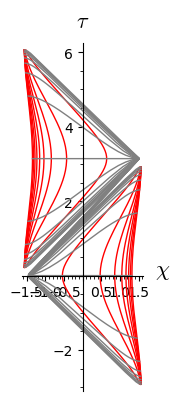

In [47]:
graph_XP = XP.plot(chart=XC, ambient_coords=(ch, ta), fixed_coords={th: pi/2, Ph: 0},
                   ranges={T: (-9, 9), R: (-9, 8)}, color={T: 'red', R: 'grey'},
                   number_values=17, plot_points=200)
show(graph_XP, aspect_ratio=1)

In [48]:
NP1 = NP.open_subset('NP1', latex_name=r'\mathscr{N}_{\rm P}^+',
                     coord_def={XP: R>0})
NP1

Open subset NP1 of the 4-dimensional Lorentzian manifold N

In [49]:
with assuming(R>0):
    for v in J[:-1]:
        show(v.display(XP))

J_0 = 1/2*(R^2*T^2 + R^2 + 1)/R^2 ∂/∂T - R*T ∂/∂R - 1/R ∂/∂Ph

J_1 = T ∂/∂T - R ∂/∂R

J_2 = -1/2*(R^2*T^2 - R^2 + 1)/R^2 ∂/∂T + R*T ∂/∂R + 1/R ∂/∂Ph

In [50]:
with assuming(R>0):
    for v in K[:-1]:
        show(v.display(XP))

K_0 = 2*T ∂/∂T - 2*R ∂/∂R

K_1 = -(R^2*T^2 + 1)/R^2 ∂/∂T + 2*R*T ∂/∂R + 2/R ∂/∂Ph

K_2 = ∂/∂T

### Plot of the Killing vector $J_1$

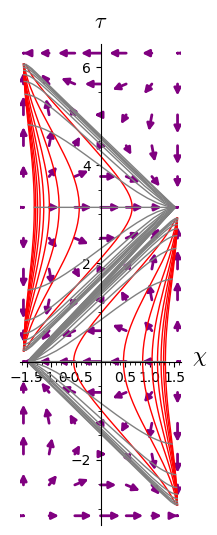

In [51]:
graph_J1 = J1.plot(chart=XC, ambient_coords=(ch, ta), chart_domain=XC, 
                   fixed_coords={th: pi/2, ps: 0}, ranges={ta: (-pi, 2*pi)}, 
                   number_values={ta: 16, ch: 7},
                   color='purple', scale=0.4, arrowsize=2)
graph = graph_XP + graph_J1
show(graph, figsize=8)

### Plot of the Killing vector $K_1$

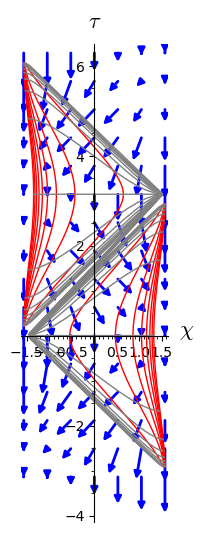

In [52]:
graph_K1 = K1.plot(chart=XC, ambient_coords=(ch, ta), chart_domain=XC, 
                   fixed_coords={th: pi/2, ps: 0}, ranges={ta: (-pi, 2*pi)}, 
                   number_values={ta: 16, ch: 7},
                   color='blue', scale=0.4, arrowsize=2)
graph = graph_XP + graph_K1
show(graph, figsize=8)

## Plot of Poincaré patches with $T=\mathrm{const}$ and $R=\mathrm{const}$ hypersurfaces

In [53]:
taf = (Conf_to_Poinc.inverse()(T, R, 0, 0)[0]).function(T, R)
taf

(T, R) |--> pi*unit_step(-R) + arctan2(2*R^2*T, -R^2*T^2 + R^2 + 1)

In [54]:
chf = (Conf_to_Poinc.inverse()(T, R, 0, 0)[1]).function(T, R)
chf

(T, R) |--> arctan(1/2*(R^2*T^2 + R^2 - 1)/R)

In [55]:
def plot_p(n, T_values=None, R_min=0.0001, R_max=100, 
           color_T='dimgray', linestyle_T='-', 
           R_values=None, T_min=-100, T_max=100, 
           color_R='red', linestyle_R='-'):
    n2 = 2*n
    res = polygon([(pi/2, (n2 - 1)*pi), (-pi/2, n2*pi), (pi/2, (n2 + 1)*pi)], 
                  color='white', edgecolor='black')
    res += line([(pi/2, (n2 - 1)*pi), (-pi/2, n2*pi), (pi/2, (n2 + 1)*pi)], 
                color='black', thickness=3)
    if T_values is not None:
        for T0 in T_values:
            res += parametric_plot((chf(T0, R), taf(T0, R) + n2*pi), (R, R_min, R_max), 
                                   color=color_T, linestyle=linestyle_T)
    if R_values is not None:
        for R0 in R_values:
            res += parametric_plot((chf(T, R0), taf(T, R0) + n2*pi), (T, T_min, T_max), 
                                   color=color_R, linestyle=linestyle_R)
    return res


def plot_m(n, T_values=None, R_min=-100, R_max=-0.0001, 
           color_T='dimgray', linestyle_T='-', 
           R_values=None, T_min=-100, T_max=100, 
           color_R='red', linestyle_R='-'):
    n2 = 2*n
    res = polygon([(-pi/2, n2*pi), (pi/2, (n2 + 1)*pi), (-pi/2, (n2 + 2)*pi)], 
                  color='cornsilk', edgecolor='black')
    res += line([(-pi/2, n2*pi), (pi/2, (n2 + 1)*pi), (-pi/2, (n2 + 2)*pi)], 
                color='black', thickness=3)
    if T_values is not None:
        for T0 in T_values:
            res += parametric_plot((chf(T0, R), taf(T0, R) + n2*pi), (R, R_min, R_max), 
                                   color=color_T, linestyle=linestyle_T)
    if R_values is not None:
        for R0 in R_values:
            res += parametric_plot((chf(T, R0), taf(T, R0) + n2*pi), (T, T_min, T_max), 
                                   color=color_R, linestyle=linestyle_R)
    return res



In [56]:
R_val_p = [0.2, 0.4, 0.6, 0.8, 1]
R_val_m = [-1, -0.8, -0.6, -0.4, -0.2] 
T_val = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]

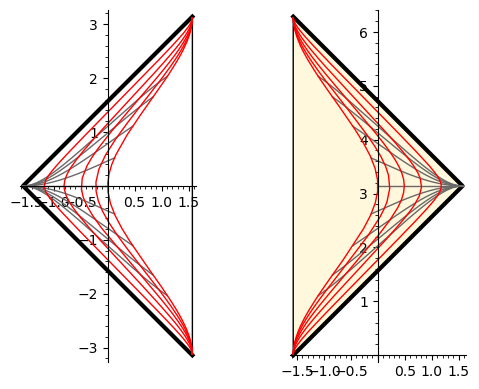

In [57]:
graphics_array([plot_p(0, T_values=T_val, R_max=R_val_p[-1], R_values=R_val_p),
                plot_m(0, T_values=T_val, R_min=R_val_m[0], R_values=R_val_m)])

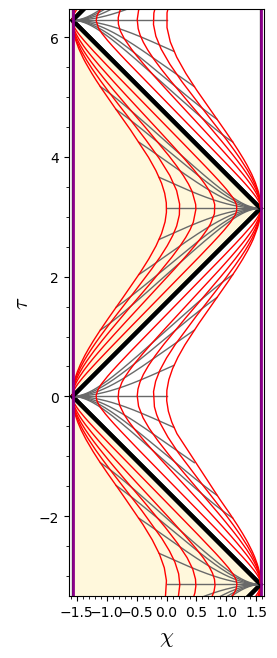

In [58]:
graph = Graphics()
for n in [-1, 0, 1]:
    graph += plot_p(n, T_values=T_val, R_max=R_val_p[-1], R_values=R_val_p)
    graph += plot_m(n, T_values=T_val, R_min=R_val_m[0], R_values=R_val_m)
graph += line([(-pi/2, -4), (-pi/2, 8)], color='darkmagenta', thickness=2) \
         + line([(pi/2, -4), (pi/2, 8)], color='darkmagenta', thickness=2)
graph.axes_labels([r'$\chi$', r'$\tau$'])
show(graph, ymin=-pi, ymax=2*pi, frame=True, axes=False, figsize=10)

Adding some labels:

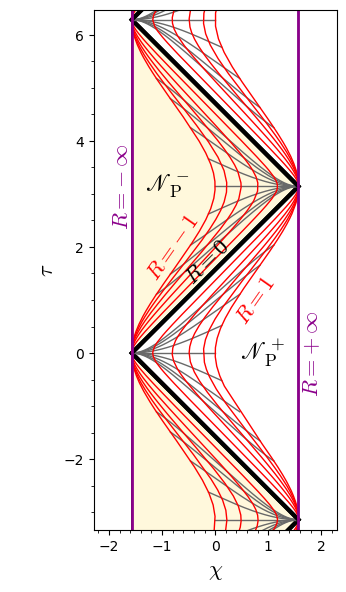

In [59]:
graph += text(r"$R=\!+\infty$", (pi/2+0.25, 0), rotation=90, color='darkmagenta',
              fontsize=16) \
         + text(r"$R=\!-\infty$", (-pi/2-0.2, pi), rotation=90, color='darkmagenta',
                fontsize=16) \
         + text(r"$R=1$", (0.75, 1), rotation=55, color='red', fontsize=16) \
         + text(r"$R=\!-1$", (-0.8, 2), rotation=55, color='red', fontsize=16) \
         + text(r"$R=0$", (-0.15, pi/2+0.15), rotation=45, color='black', fontsize=16) \
         + text(r"$\mathscr{N}_{\rm P}^+$", (0.9, 0), color='black', fontsize=18) \
         + text(r"$\mathscr{N}_{\rm P}^-$", (-0.9, pi), color='black', fontsize=18)
graph.axes_labels([r'$\chi$', r'$\tau$'])
graph.save("exk_NHEK_spacetime.pdf", xmin=-2.2, xmax=2.2, ymin=-pi, ymax=2*pi, 
           frame=True, axes=False, figsize=9)
show(graph, xmin=-2.2, xmax=2.2, ymin=-pi, ymax=2*pi, frame=True, axes=False, figsize=9)